In [ ]:
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import numpy as np
import wave
import numpy as np
import matplotlib.pyplot as plt

# 입력 wav 파일 경로와 이름
input_file = "./NoisyData/p226_251.wav"
# 출력 wav 파일 경로와 이름
output_file = "output.wav"
# 필터링할 주파수 범위 (단위: Hz)
low_freq = 100
high_freq = 1000

# wav 파일 로드
rate, data = wavfile.read(input_file)

# 필터링을 위한 상수 설정
nyq = 0.5 * rate
low = low_freq / nyq
high = high_freq / nyq
order = 5

# Butterworth bandpass 필터 계수 계산
b, a = butter(order, [low, high], btype='band')

# 필터 적용
filtered_data = lfilter(b, a, data)

# 출력 wav 파일 저장
wavfile.write(output_file, rate, np.asarray(filtered_data, dtype=np.int16))

FileNotFoundError: [Errno 2] No such file or directory: './NoisyData/p226_251.wav'

In [5]:
rate

16000

In [5]:
rate

16000

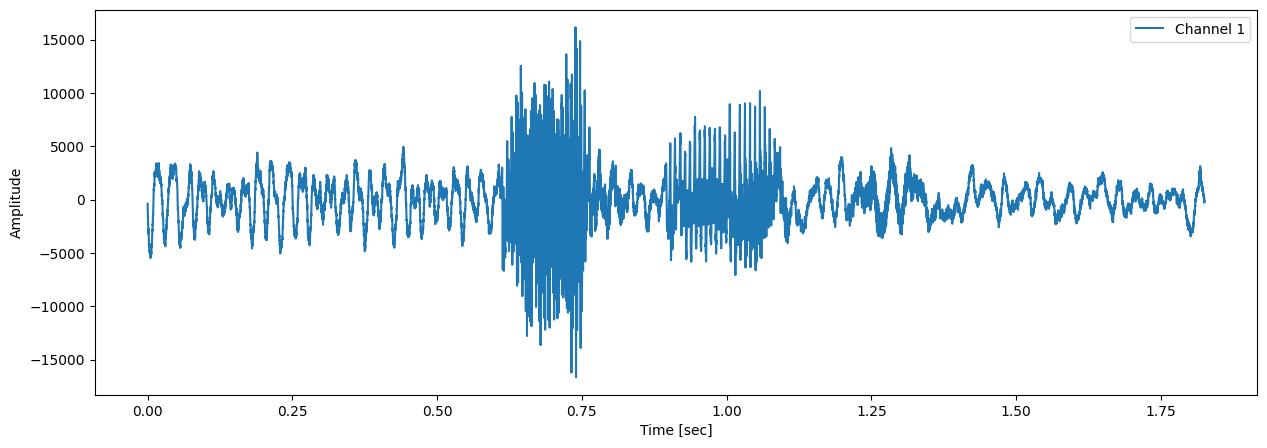

In [14]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wav 파일 열기
with wave.open('./NoisyData/p226_251.wav', 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    sample_rate = wav_file.getframerate()

    # wave 파일에서 모든 프레임을 읽어와서 numpy 배열로 변환합니다.
    # np.frombuffer를 사용하여 wav_file.readframes()에서 읽은 이진 데이터를 numpy 배열로 변환합니다.
    wave_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

# 각 채널의 데이터를 따로 추출합니다.
if num_channels == 2:
    channel1 = wave_data[::num_channels]
    channel2 = wave_data[1::num_channels]
else:
    channel1 = wave_data

# x축 데이터 (시간) 생성
time = np.arange(0, num_frames/sample_rate, 1/sample_rate)

# 그래프 출력
plt.figure(figsize=(15,5))
plt.plot(time, channel1, label='Channel 1')
if num_channels == 2:
    plt.plot(time, channel2, label='Channel 2')
plt.legend()
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

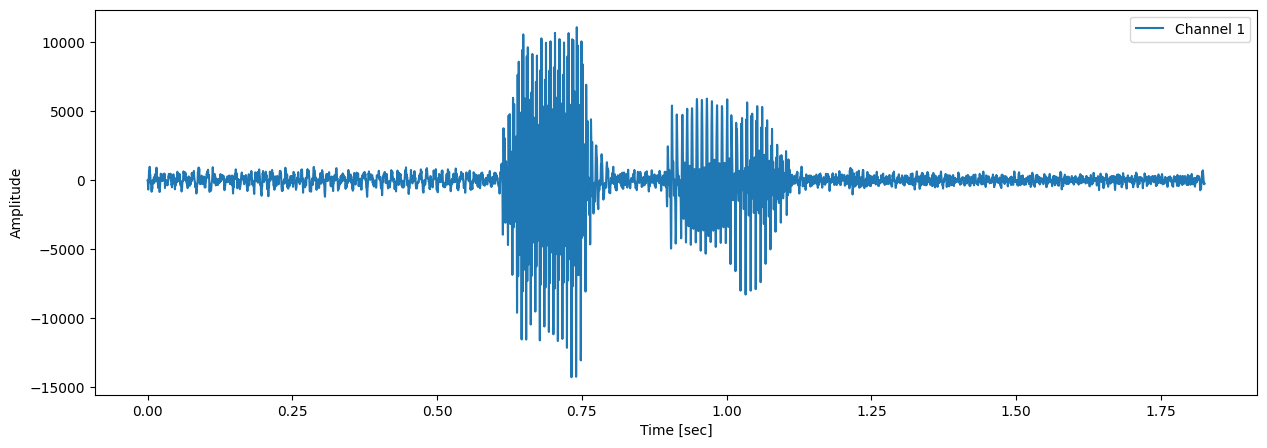

In [16]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wav 파일 열기
with wave.open('output.wav', 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    sample_rate = wav_file.getframerate()

    # wave 파일에서 모든 프레임을 읽어와서 numpy 배열로 변환합니다.
    # np.frombuffer를 사용하여 wav_file.readframes()에서 읽은 이진 데이터를 numpy 배열로 변환합니다.
    wave_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

# 각 채널의 데이터를 따로 추출합니다.
if num_channels == 2:
    channel1 = wave_data[::num_channels]
    channel2 = wave_data[1::num_channels]
else:
    channel1 = wave_data

# x축 데이터 (시간) 생성
time = np.arange(0, num_frames/sample_rate, 1/sample_rate)

# 그래프 출력
plt.figure(figsize=(15,5))
plt.plot(time, channel1, label='Channel 1')
if num_channels == 2:
    plt.plot(time, channel2, label='Channel 2')
plt.legend()
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

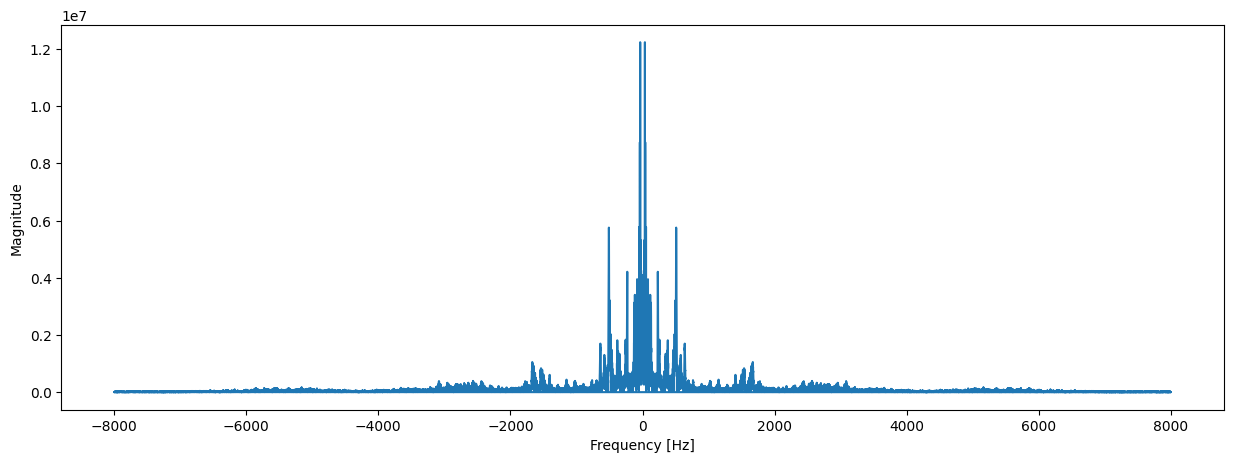

In [29]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wav 파일 열기
with wave.open('./NoisyData/p226_251.wav', 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    sample_rate = wav_file.getframerate()

    # wave 파일에서 모든 프레임을 읽어와서 numpy 배열로 변환합니다.
    # np.frombuffer를 사용하여 wav_file.readframes()에서 읽은 이진 데이터를 numpy 배열로 변환합니다.
    wave_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

# 각 채널의 데이터를 따로 추출합니다.
if num_channels == 2:
    channel1 = wave_data[::num_channels]
    channel2 = wave_data[1::num_channels]
else:
    channel1 = wave_data

# 시간 축 생성
time = np.arange(0, num_frames/sample_rate, 1/sample_rate)

# 주파수 영역으로 변환
freq_data = np.fft.fft(channel1)

# 주파수 축 생성
freq = np.fft.fftfreq(len(channel1), d=1/sample_rate)

# 그래프 출력
plt.figure(figsize=(15,5))
plt.plot(freq, np.abs(freq_data))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()


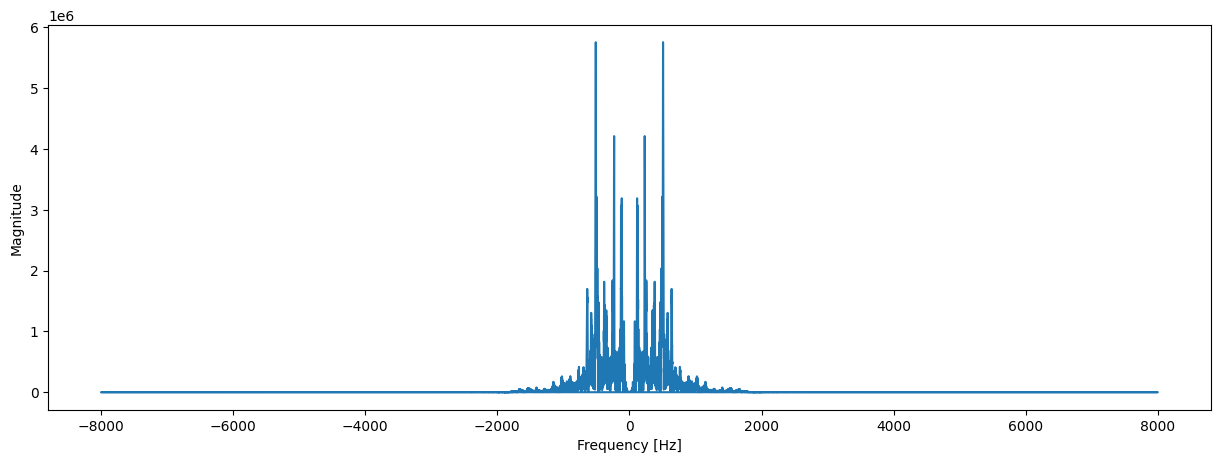

In [30]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wav 파일 열기
with wave.open('output.wav', 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    sample_rate = wav_file.getframerate()

    # wave 파일에서 모든 프레임을 읽어와서 numpy 배열로 변환합니다.
    # np.frombuffer를 사용하여 wav_file.readframes()에서 읽은 이진 데이터를 numpy 배열로 변환합니다.
    wave_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

# 각 채널의 데이터를 따로 추출합니다.
if num_channels == 2:
    channel1 = wave_data[::num_channels]
    channel2 = wave_data[1::num_channels]
else:
    channel1 = wave_data

# 시간 축 생성
time = np.arange(0, num_frames/sample_rate, 1/sample_rate)

# 주파수 영역으로 변환
freq_data = np.fft.fft(channel1)

# 주파수 축 생성
freq = np.fft.fftfreq(len(channel1), d=1/sample_rate)

# 그래프 출력
plt.figure(figsize=(15,5))
plt.plot(freq, np.abs(freq_data))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()


In [2]:
def bandpass(input_path_name, output_name):
    # 입력 wav 파일 경로와 이름
    input_file = input_path_name
    # 출력 wav 파일 경로와 이름
    output_file = output_name
    # 필터링할 주파수 범위 (단위: Hz)
    low_freq = 100
    high_freq = 1000

    # wav 파일 로드
    rate, data = wavfile.read(input_file)
    print(rate, data)
    # 필터링을 위한 상수 설정
    nyq = 0.5 * rate
    low = low_freq / nyq
    high = high_freq / nyq
    order = 5

    # Butterworth bandpass 필터 계수 계산
    b, a = butter(order, [low, high], btype='band')

    # 필터 적용
    filtered_data = lfilter(b, a, data)

    # 출력 wav 파일 저장
    wavfile.write(output_file, rate, np.asarray(filtered_data, dtype=np.int16))
    
    ### 시간영역 파형 그리기
    
    with wave.open(input_file, 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
        num_frames1 = wav_file.getnframes()
        num_channels1 = wav_file.getnchannels()
        sample_width1 = wav_file.getsampwidth()
        sample_rate1 = wav_file.getframerate()
        # wave 파일에서 모든 프레임을 읽어와서 numpy 배열로 변환합니다.
        # np.frombuffer를 사용하여 wav_file.readframes()에서 읽은 이진 데이터를 numpy 배열로 변환합니다.
        wave_data1 = np.frombuffer(wav_file.readframes(num_frames1), dtype=np.int16)
    
    with wave.open(output_file, 'r') as wav_file:
    # wave 파일의 프레임 수, 채널 수, 프레임 당 샘플 수, 샘플 너비, 압축 유형 등의 정보를 가져옵니다.
        num_frames2 = wav_file.getnframes()
        num_channels2 = wav_file.getnchannels()
        sample_width2 = wav_file.getsampwidth()
        sample_rate2 = wav_file.getframerate()
        wave_data2 = np.frombuffer(wav_file.readframes(num_frames2), dtype=np.int16)   
    
   

   # 각 채널의 데이터를 따로 추출합니다.
    if num_channels1 == 2:
        channel1 = wave_data1[::num_channels1]
        channel2 = wave_data1[1::num_channels1]
    else:
        channel1 = wave_data1

    if num_channels2 == 4:
        channel3 = wave_data2[::num_channels2]
        channel4 = wave_data2[1::num_channels2]
    else:
        channel3 = wave_data2
    # x축 데이터 (시간) 생성
    time1= np.arange(0, num_frames1/sample_rate1, 1/sample_rate1)
    time2 = np.arange(0, num_frames2/sample_rate2, 1/sample_rate2)

    # 그래프 출력
    plt.figure(figsize=(15,5))
    plt.plot(time1, channel1, label='Channel 1')
    if num_channels == 2:
        plt.plot(time1, channel2, label='Channel 2')
    plt.legend()
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.show()
    
    plt.figure(figsize=(15,5))
    plt.plot(time2, channel3, label='Channel 1')
    if num_channels == 2:
        plt.plot(time2, channel4, label='Channel 2')
    plt.legend()
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.show()
    
    freq_data1 = np.fft.fft(channel1)
    freq_data2 = np.fft.fft(channel3)

    # 주파수 축 생성
    freq1 = np.fft.fftfreq(len(channel1), d=1/sample_rate1)
    freq2 = np.fft.fftfreq(len(channel3), d=1/sample_rate2)

    # 그래프 출력
    plt.figure(figsize=(15,5))
    plt.plot(freq1, np.abs(freq_data1))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.show()
    
    # 그래프 출력
    plt.figure(figsize=(15,5))
    plt.plot(freq2, np.abs(freq_data2))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.show()

In [4]:
bandpass("./01_01_000606_210809_SD.wav", "output.wav")

FileNotFoundError: [Errno 2] No such file or directory: './01_01_000606_210809_SD.wav'

In [69]:
import speech_recognition as sr
#import sys #-- 텍스트 저장시 사용

r = sr.Recognizer()
kr_audio = sr.AudioFile('./news.wav')

with kr_audio as source:
    audio = r.record(source)

#sys.stdout = open('news_out.txt', 'w') #-- 텍스트 저장시 사용
print(r.recognize_google(audio, language='ko-KR')) #-- 한글 언어 사용

#sys.stdout.close() #-- 텍스트 저장시 사용

안녕하십니까 MBC 뉴스특보입니다 국민은행 윤석열 대선후보가 여의도 국민의 힘 당사에서 선대위 개편안을 직접 발표합니다 바로 현장을 연결해 보겠습니다


In [47]:
import speech_recognition as sr
#import sys #-- 텍스트 저장시 사용

r = sr.Recognizer()

audio_file = sr.AudioFile('./output.wav')

with audio_file as source:
    audio = r.record(source)

#sys.stdout = open('stdout.txt', 'w') #-- 텍스트 저장시 사용

print(r.recognize_google(audio))

#sys.stdout.close() #-- 텍스트 저장시 사용

assessment
